# Problem Set 10
Name: S Sriniketh Desikan \
Roll No.: EP23B051

In [4]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import math as mt

### Problem 1
Define a function ‘RK4 =(f(x,y), x0, y0, h, N)’ which will return the solution of a ODE of the form dy
dx =

f (x, y ) for N steps of size h using 4th order Runge-Kutta (R-K) method.
Solve the ODE (1+x)
dy
dx −2y + 18x = 0 with y(0)=4 interval h=0.05 in the interval (0, 3) by using function
RK4. Compare this with the analytical solution, from Euler’s method, and from RK2 method

In [7]:
# denote dy/dx by y1
def RK4(y1,x0,y0,h,N):
    x=np.zeros(N)
    y=np.zeros(N)
    x[0]=x0
    y[0]=y0
    for i in range(0,N-1):
        k1=y1(x[i],y[i])
        k2=y1(x[i]+h/2,y[i]+h*k1/2)
        k3=y1(x[i]+h/2,y[i]+h*k2/2)
        k4=y1(x[i]+h,y[i]+h*k3)
        y[i+1]=y[i]+h*(((k1+k4)/6)+((k2+k3)/3))
        x[i+1]=x[i]+h
    return x,y
def Eul(y1, x0, y0, h, N):
    # y'=(y(x+h)-y(x))/h
    x=x0
    y=y0
    for i in range(N):
        y+=h*y1(x,y)
        x+=h
    return y

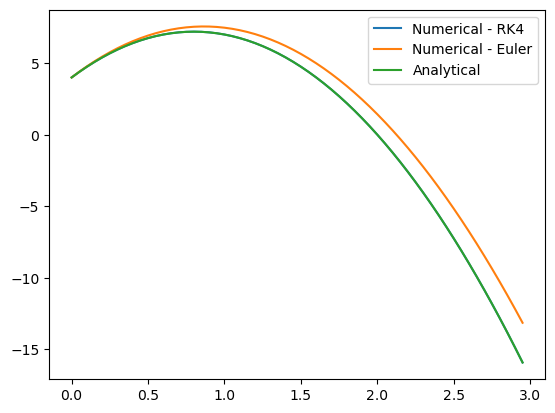

In [9]:
def g1(x,y):
    return (2*y-18*x)/(1+x)
x,yN=RK4(g1,0,4,0.05,int(3/0.05))
yE=[4]
for i in range(len(x)-1):
    yE.append(Eul(g1,x[i],yE[i],0.05,1))
plt.plot(x,yN,label='Numerical - RK4')
plt.plot(x,yE,label='Numerical - Euler')
plt.plot(x,(-5*x**2+8*x+4),label='Analytical')
plt.legend()
plt.show()

### Problem 2
**Random Walk**

It is late night and a drunkard is walking along a very long street. The drunkard is not sure which is the way
home, so he/she randomly takes steps of length 1.0 m forward or backward. He/She takes one step every
second continuously for 1 hr.

Simulate this process by using a random number generator from python or C library.
Generate 100 different realizations of the random sequence of steps by using a different seed each time.
Graphically show the random walks for two realizations.

Calculate the displacement of the drunkard for each realization and show graphically how these are distributed
using a histogram.
Calculate the mean and the root mean square (r.m.s.) displacement of the drunkard after 1 hr.

Increase the time (number of steps) and show that the mean displacement tends to 0 and the r.m.s. dis-
placement scales as the square-root of the time. Also try to derive the same results analytically.

**An example to understand random - trying to implement the central limit theorem**

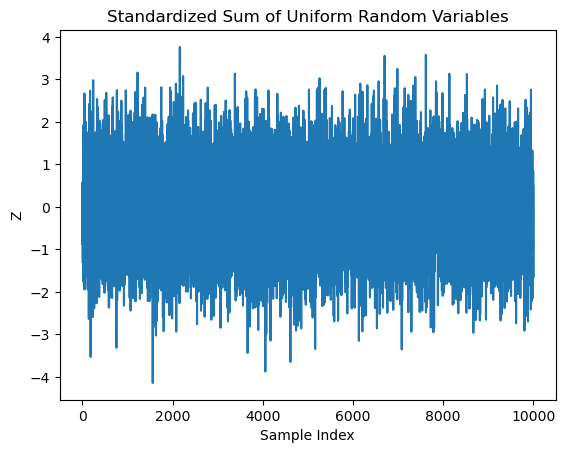

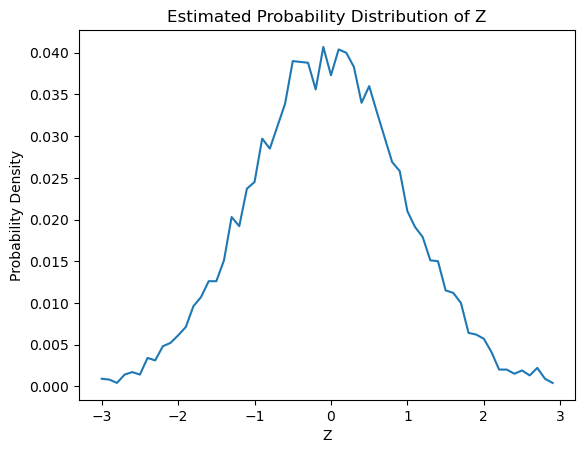

In [13]:
n=9999
precision=0.1
s=0
S=[]
M=[]
mu=0.5
sigma=1/mt.sqrt(12)
samples=10000
R=range(0,samples)
for _ in R:
    l=random.rand(n)
    s=np.sum(l)
    S.append(s)
    M.append(s/n)
M=np.array(M)
S=np.array(S)
Z=(S-(n*mu))/(sigma*mt.sqrt(n))
plt.plot(R,Z)
plt.title("Standardized Sum of Uniform Random Variables")
plt.xlabel("Sample Index")
plt.ylabel("Z")
plt.show()
# This is essentially noise - a sample of all the data. I want to estimate the rough probabilty distribution
A=[]
B=[]
a=-3
b=3
for c in np.arange(a,b,precision):
    k=np.sum((Z>c)&(Z<(c+precision)))
    A.append(c)
    B.append(k/samples)
plt.plot(A,B)
plt.title("Estimated Probability Distribution of Z")
plt.xlabel("Z")
plt.ylabel("Probability Density")
plt.show()

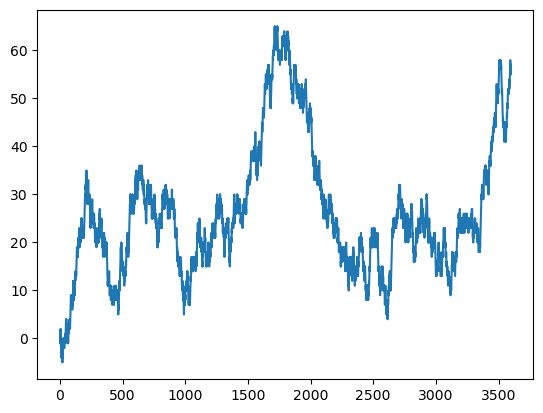

57.0


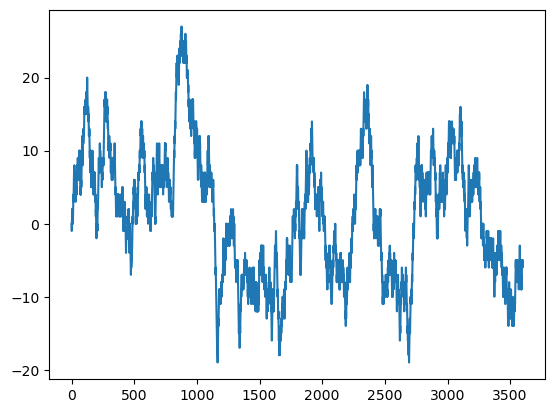

-5.0
[  76. -132.   84.   58.  -58.   -4.   18.  -42.  -16.  -50.  -38.  -32.
   80.  -16.    4.   -2.   34.   10.   94.   46.  -26.  -62.   10.   60.
   22.   30.   -4.  -50.   16.   54.   60.   14.  -14.   12.   28.  -40.
 -108.  -34.   18.  -60.   66.  -40.   20.  -56.  -34.   60.  -18.   62.
  -16.  -36.  -60.   -8.   -8.  -40.   38.   10.  -82.   36.   52.   76.
  -64.  -66.  -68.  -50.  106.  -66.  -58.   42.  -12.   80.  -66.   -4.
   20.  -92.  -70.  -16.   52.   24.   34.  -70.   42.   66.   14.  -52.
  124. -114.   92.   60.   66.   44.   84.  -24.   -2.   32.  -72.  -36.
    8.  -26.   62.    0.]


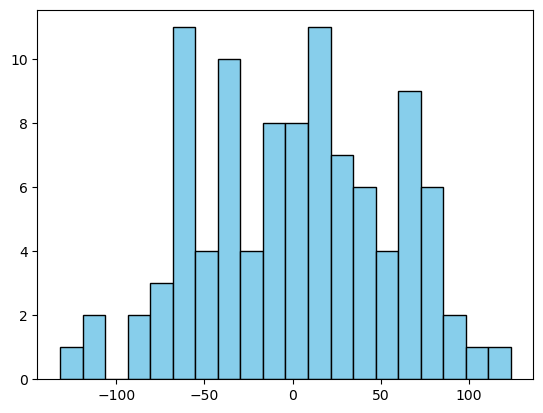

In [14]:
l=[]
T=3600
for j in range(100):
    w=np.zeros(T)
    random.seed(234567*j)
    for i in range(len(w)):
        w[i]=random.choice([-1,1])
    l.append(w)
t=np.arange(0,T)
k=3
v0=[]
for i in range(0,T):
    v0.append(np.sum(l[k][0:i]))
plt.plot(t,v0)
plt.show()
print(v0[-1])
t=np.arange(0,T)
k=26
v0=[]
for i in range(0,T):
    v0.append(np.sum(l[k][0:i]))
plt.plot(t,v0)
plt.show()
print(v0[-1])
v=[]
x=np.arange(0,100)
for i in range(0,100):
    v.append(np.sum(l[i]))
v=np.array(v)
print(v)
plt.hist(v,bins=20,color='skyblue',edgecolor='black')
plt.show()

In [16]:
print("The mean displacement of the drunkard is",np.sum(v)/100)

The mean displacement of the drunkard is 0.86


In [17]:
print("The rms displacement of the drunkard is",np.sqrt(np.sum(v**2)/100))

The rms displacement of the drunkard is 53.95664926586898


The mean displacements for different times are [ 0.86  2.08  2.    3.06  4.74  4.48  2.4   1.8   1.02  0.48  2.62  3.5
  5.04  3.46  4.06  3.62  2.38  1.94  2.34  2.2   1.86  2.42  1.94  0.5
 -0.24  2.8   3.74  2.44  1.98  2.78  2.9   3.34  2.52  1.82  2.06  2.82
  2.44  2.28  3.88  4.08  4.66  3.94  2.38  4.34  6.28  5.3   5.82  8.72
  8.52  8.44  9.22  9.02 12.48 12.76 11.6  12.44 13.06 10.14  5.66  5.22]
The RMS displacements for different times are [ 53.95664927  53.91363464  53.87541183  54.6227059   55.25468306
  57.28978967  58.90806396  61.20620884  62.47783607  63.2142389
  63.66066289  66.65703264  68.25247248  66.76136607  70.09621958
  72.10020804  72.47923841  74.34433401  74.3916662   75.02026393
  74.37553361  77.33175286  79.04808663  80.28972537  81.75866927
  83.36306136  81.21551576  83.6456813   83.66193878  86.68171664
  89.16838005  88.64468399  88.54241921  88.71099143  88.64964749
  87.95930877  87.63058827  90.2660512   91.31703018  92.26158464
  93.74881333  9

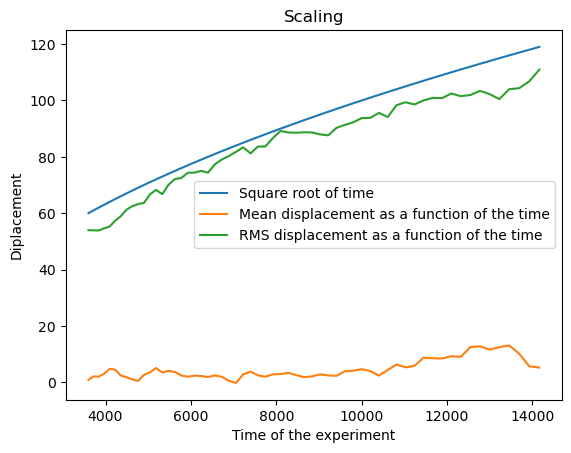

In [35]:
def MuRMS(T):
    l=[]
    for j in range(100):
        w=np.zeros(T)
        random.seed(234567*j)
        for i in range(len(w)):
            w[i]=random.choice([-1,1])
        l.append(w)
    t=np.arange(0,T)
    k=3
    v0=[]
    for i in range(0,T):
        v0.append(np.sum(l[k][0:i]))
    v=[]
    x=np.arange(0,100)
    for i in range(0,100):
        v.append(np.sum(l[i]))
    v=np.array(v)
    return np.sum(v)/100,np.sqrt(np.sum(v**2)/100)
TA=np.arange(60,120,1)
TA=TA**2
Mu=[]
RMS=[]
for T in TA:
    (x,y)=MuRMS(T)
    Mu.append(x)
    RMS.append(y)
Mu=np.array(Mu)
RMS=np.array(RMS)
print("The mean displacements for different times are",Mu)
print("The RMS displacements for different times are",RMS)
plt.plot(TA,np.sqrt(TA),label='Square root of time')
plt.plot(TA,Mu,label='Mean displacement as a function of the time')
plt.plot(TA,RMS,label='RMS displacement as a function of the time')
plt.legend()
plt.xlabel('Time of the experiment')
plt.ylabel('Diplacement')
plt.title('Scaling')
plt.show()

From the above results, we can conclude that the mean is close to zero and the rms value roughly scales as the square-root of the time value

### Problem 3
**Monte Carlo Integration**
Estimating the value of Pi using Monte Carlo integration.

In [24]:
# 2D approximation of Pi
def f(x,y,R):
    if x**2+y**2<=R**2:
        return 1
    else:
        return 0
N=99999
x0=0
y0=0
R=1
I=0
for i in range(N):
    x=random.uniform()*(R-x0)+x0
    y=random.uniform()*(R-y0)+y0
    z=f(x,y,R)
    I+=z*1
print(4*I*(1/N))

3.140751407514075


### Problem 4
Calculate the following integrals (I) using Monte-Carlo method (you can use a random number generator
from the python ):

$I =
\int_0^\pi
cos(x)dx$


$I =
\int_0^1 x^2 dx$

How will you calculate the standard deviation σ of the integral I?
Plot I and σ as a function of N (where N is the number of random points used to estimate the integral).

In [26]:
# Example of a 1D integral before proceeding with the problem
def func(x):
    return np.cos(x)
b=np.pi
a=0
N=999999
s=0
Var1=0
Var2=0
for i in range(N):
    x=random.uniform()*(b-a)+a
    y=func(x)
    s+=y
    Var1+=y**2/N
    Var2+=y/N
Var=Var1-Var2**2
Mu=Var2
print("The integral is",(b-a)*(1/N)*s)
print("The mean and the variance are",Mu,Var)

The integral is -0.0021092778819379277
The mean and the variance are -0.0006714040025296162 0.5002668668920957


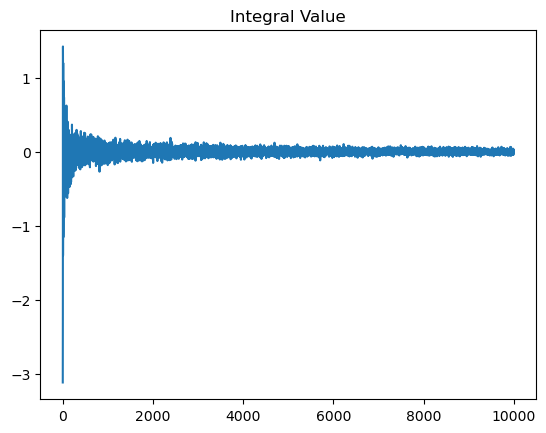

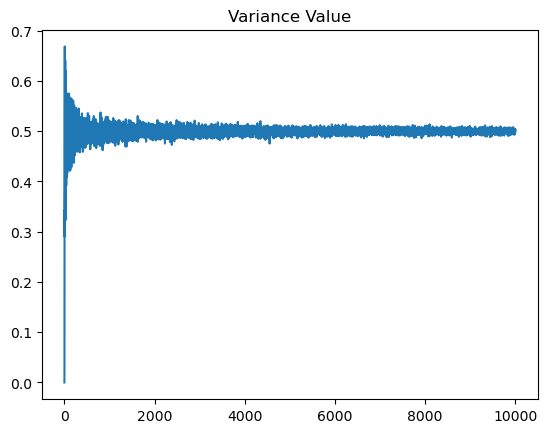

In [43]:
def func(x):
    return np.cos(x)
b=np.pi
a=0
IA=[]
VarA=[]
NA=range(1,10000)
for N in range(1,10000):
    s=0
    Var1=0
    Var2=0
    for i in range(N):
        x=random.uniform()*(b-a)+a
        y=func(x)
        s+=y
        Var1+=y**2/N
        Var2+=y/N
    Var=Var1-Var2**2
    Mu=Var2
    I=(b-a)*(1/N)*s
    IA.append(I)
    VarA.append(Var)
plt.plot(NA,IA)
plt.title('Integral Value')
plt.show()
plt.plot(NA,VarA)
plt.title('Variance Value')
plt.show()

In [27]:
# Example of a 1D integral before proceeding with the problem
def func(x):
    return x**2
b=1
a=0
N=999999
s=0
Var1=0
Var2=0
for i in range(N):
    x=random.uniform()*(b-a)+a
    y=func(x)
    s+=y
    Var1+=y**2/N
    Var2+=y/N
Var=Var1-Var2**2
Mu=Var2
print("The integral is",(b-a)*(1/N)*s)
print("The mean and the variance are",Mu,Var)

The integral is 0.33358383781170675
The mean and the variance are 0.3335838378116889 0.08884184035109055


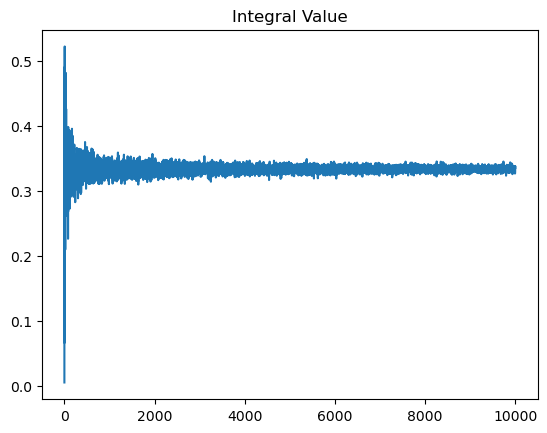

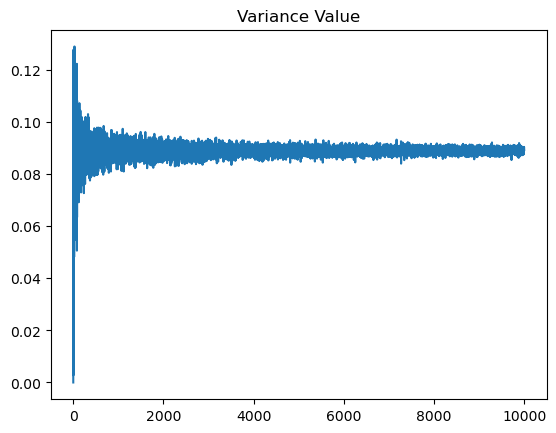

In [45]:
def func(x):
    return x**2
b=1
a=0
IA=[]
VarA=[]
NA=range(1,10000)
for N in range(1,10000):
    s=0
    Var1=0
    Var2=0
    for i in range(N):
        x=random.uniform()*(b-a)+a
        y=func(x)
        s+=y
        Var1+=y**2/N
        Var2+=y/N
    Var=Var1-Var2**2
    Mu=Var2
    I=(b-a)*(1/N)*s
    IA.append(I)
    VarA.append(Var)
plt.plot(NA,IA)
plt.title('Integral Value')
plt.show()
plt.plot(NA,VarA)
plt.title('Variance Value')
plt.show()